## Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

#### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

#### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

### Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
D = np.array([2, 11,  7, 19, 14,  9,  9,  4, 16, 12, 16, 18, 13, 16, 10, 13,  1, 6, 12,  2, 14, 14, 1, 1])
n = len(D)
n

24

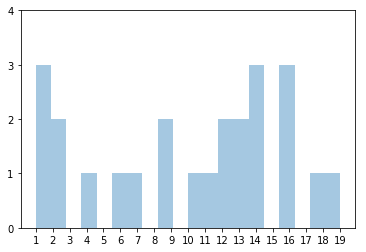

In [3]:
sns.distplot(D, bins=20, kde=False)
plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

In [4]:
mu = 1/(n)*np.sum(D)
mu

10.0

In [5]:
D.mean()

10.0

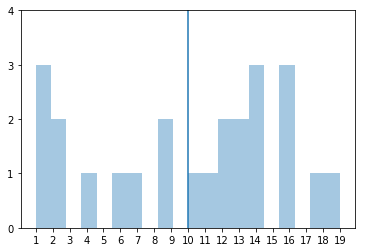

In [6]:
sns.distplot(D, bins=20, kde=False)
plt.axvline(D.mean())
plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

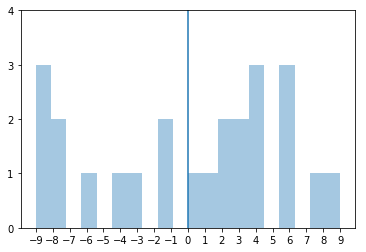

In [9]:
sns.distplot(D-D.mean(), bins=20, kde=False)
plt.axvline(0)
plt.xticks(list(range(-9,10)))
plt.yticks(list(range(5)));

### Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [10]:
(D-mu)**2

array([64.,  1.,  9., 81., 16.,  1.,  1., 36., 36.,  4., 36., 64.,  9.,
       36.,  0.,  9., 81., 16.,  4., 64., 16., 16., 81., 81.])

In [12]:
var = 1/n*np.sum((D-mu)**2)
var

31.75

In [13]:
D.var()

31.75

In [14]:
type(D)

numpy.ndarray

Note that the square root of the variance is the standard deviation.

In [15]:
np.sqrt(var)

5.634713834792322

In [16]:
D.std()

5.634713834792322

In [17]:
np.sqrt((3*(-2.2)**2+(0.8)**2+(2.8)**2)/5)

2.1447610589527217

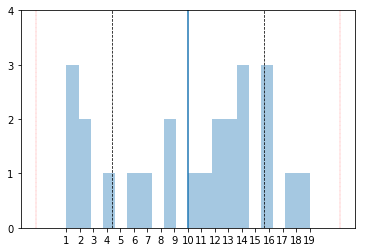

In [19]:
sns.distplot(D, bins=20, kde=False)

plt.axvline(D.mean())
plt.axvline(D.mean() +   D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean() -   D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean() + 2*D.std(), color='red', lw=.25, ls="dashed")
plt.axvline(D.mean() - 2*D.std(), color='red', lw=.25, ls="dashed")

plt.xticks(list(range(1,20)))
plt.yticks(list(range(5)));

### Advanced Cases: Skew and Kurtosis

#### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [20]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

-0.3186098962942898

In [21]:
import scipy.stats as st

In [22]:
st.skew(D)

-0.31860989629428965

In [23]:
np.median(D)

11.5

/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


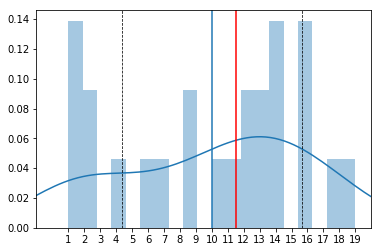

In [24]:
sns.distplot(D, bins=20, kde=True)
plt.axvline(D.mean()+D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()-D.std(), color='black', lw=.75, ls="dashed")
plt.axvline(D.mean()+2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean()-2*D.std(), color='black', lw=.25, ls="dashed")
plt.axvline(D.mean())
plt.axvline(np.median(D), color="red")
plt.xlim(-1,20)
plt.xticks(list(range(1,20)));

In [25]:
from statsmodels.sandbox.distributions.extras import pdf_mvsk

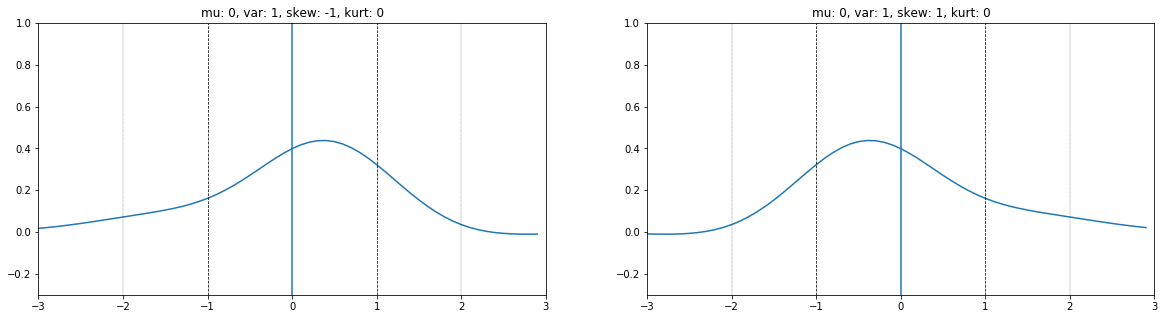

In [26]:
_, ax = plt.subplots(1,2,figsize=(20,5))

mvsk = [0,1,-1,0]
pdffunc = pdf_mvsk(mvsk)
rng = np.arange(-3, 3, 0.1)
ax[0].plot(rng, pdffunc(rng))
ax[0].axvline(1, color='black', lw=.75, ls="dashed")
ax[0].axvline(-1, color='black', lw=.75, ls="dashed")
ax[0].axvline(2, color='black', lw=.25, ls="dashed")
ax[0].axvline(-2, color='black', lw=.25, ls="dashed")
ax[0].axvline(0)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-0.3, 1)
ax[0].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk))

mvsk = [0,1,1,0]
pdffunc = pdf_mvsk(mvsk)
ax[1].plot(rng, pdffunc(rng))
ax[1].axvline(1, color='black', lw=.75, ls="dashed")
ax[1].axvline(-1, color='black', lw=.75, ls="dashed")
ax[1].axvline(2, color='black', lw=.25, ls="dashed")
ax[1].axvline(-2, color='black', lw=.25, ls="dashed")
ax[1].axvline(0)
ax[1].set_xlim(-3,3)
ax[1].set_ylim(-0.3, 1)
ax[1].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk));



#### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

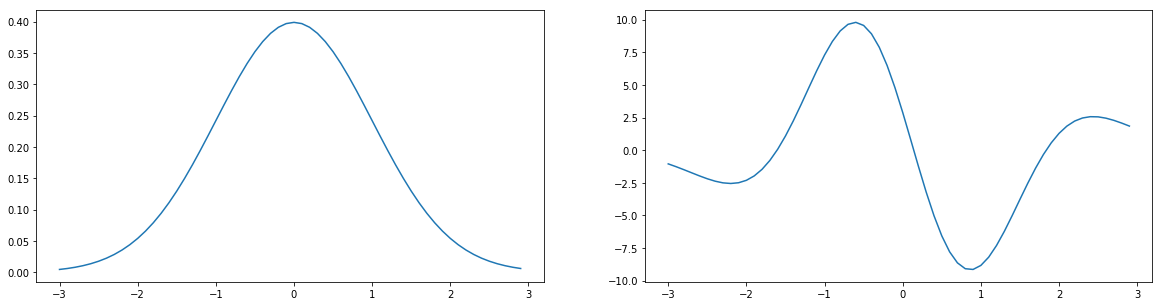

In [38]:
_, ax = plt.subplots(1,2,figsize=(20,5))
rng = np.arange(-3, 3, 0.1)

mvsk = [0,1,0,0]
pdffunc = pdf_mvsk(mvsk)
ax[0].plot(rng, pdffunc(rng))

mvsk = [0,1,100,50]
pdffunc = pdf_mvsk(mvsk)
ax[1].plot(rng, pdffunc(rng))


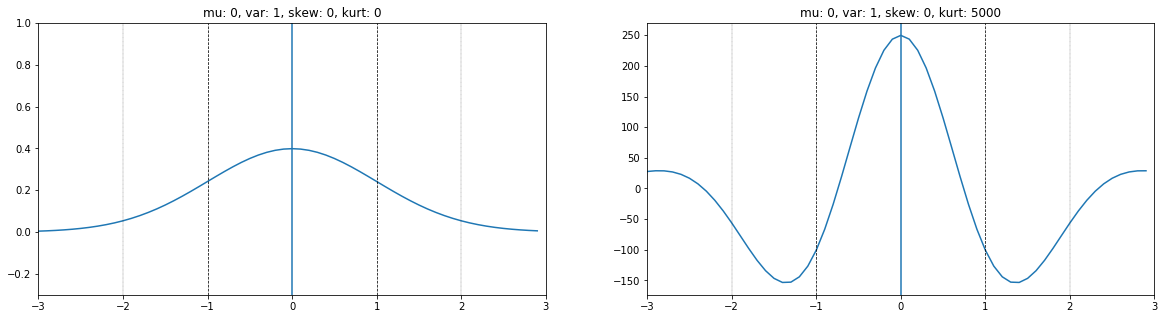

In [32]:
_, ax = plt.subplots(1,2,figsize=(20,5))

mvsk = [0,1,0,0]
pdffunc = pdf_mvsk(mvsk)
rng = np.arange(-3, 3, 0.1)
ax[0].plot(rng, pdffunc(rng))
ax[0].axvline(1, color='black', lw=.75, ls="dashed")
ax[0].axvline(-1, color='black', lw=.75, ls="dashed")
ax[0].axvline(2, color='black', lw=.25, ls="dashed")
ax[0].axvline(-2, color='black', lw=.25, ls="dashed")
ax[0].axvline(0)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-0.3, 1)
ax[0].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk))

mvsk = [0,1,0,5000]
pdffunc = pdf_mvsk(mvsk)
ax[1].plot(rng, pdffunc(rng))
ax[1].axvline(1, color='black', lw=.75, ls="dashed")
ax[1].axvline(-1, color='black', lw=.75, ls="dashed")
ax[1].axvline(2, color='black', lw=.25, ls="dashed")
ax[1].axvline(-2, color='black', lw=.25, ls="dashed")
ax[1].axvline(0)
ax[1].set_xlim(-3,3)
# ax[1].set_ylim(-0.3, 1)
ax[1].set_title("mu: {}, var: {}, skew: {}, kurt: {}".format(*mvsk));


In python:

In [34]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

1.8607477214954438

Kurtosis is the average (or expected value) of the standardized data raised to the fourth power. Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak."

In [35]:
st.kurtosis(D, fisher=False)

1.860747721495443

### Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 10.0, var: 31.75, skew: -0.31860989629428965, kurt: 1.860747721495443


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


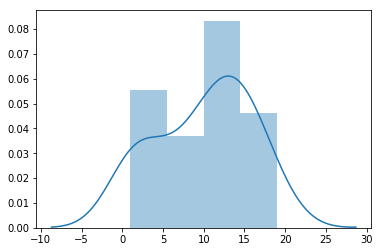

In [39]:
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 11.05, var: 29.7075, skew: -0.006832098593732931, kurt: 1.9892293503840341


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


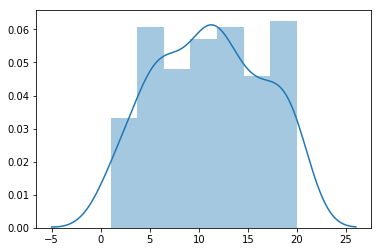

In [40]:
n = 200
D = np.random.randint(1,21, n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.523, var: 33.623470999999995, skew: -0.028365042248684153, kurt: 1.7887376795378955


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


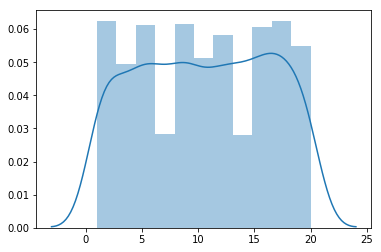

In [41]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.4558, var: 33.51154636, skew: 0.01240398431754437, kurt: 1.788785219375008


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


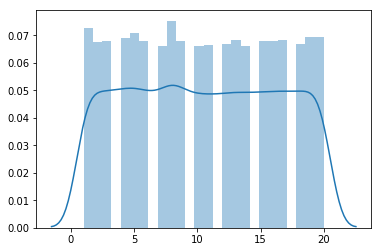

In [42]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.49089, var: 33.2990970079, skew: 0.0003296714399802486, kurt: 1.7924465835036014


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


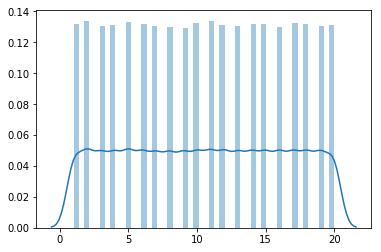

In [43]:
n = 200000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.4937925, var: 33.20619046694374, skew: 0.0020143143127730654, kurt: 1.7953765285139989


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


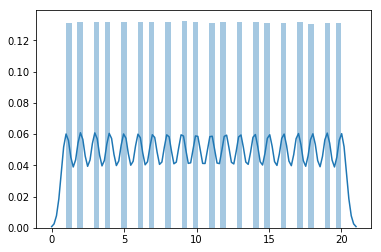

In [44]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

##### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

#### What about `randn`?

In [45]:
D

array([ 2, 14,  2, ...,  9, 18, 11])

mu: -0.46822116088483856, var: 1.0782684075632978, skew: -0.20297545753224136, kurt: 2.219867748821439


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


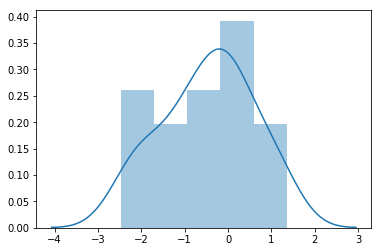

In [46]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.007935755855507454, var: 0.8220736694196961, skew: 0.17324098012572647, kurt: 3.1711952819994274


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


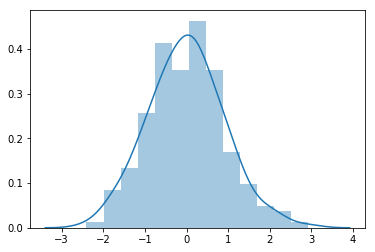

In [47]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.005331135822369467, var: 1.0426791986208785, skew: -0.050456501460134404, kurt: 3.0904797618489463


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


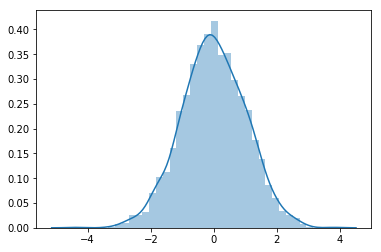

In [48]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.00490104833257059, var: 1.0178017436412516, skew: -0.010788584335332476, kurt: 3.037705489341366


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


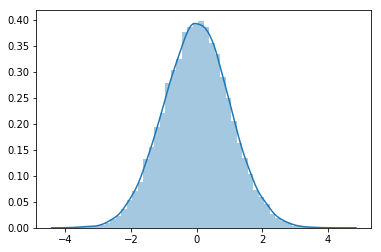

In [49]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.0042757166957309726, var: 0.9976943673803869, skew: -0.0043654281567044335, kurt: 2.993392921073331


/Users/joshuacook/miniconda3/envs/summer2018/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


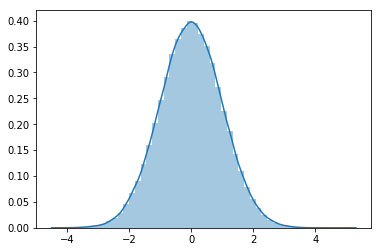

In [50]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)